In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.fft import fft, fftfreq, ifft, fftshift, ifftshift

import warnings
warnings.filterwarnings('ignore')

## General tips for computing and plotting discrete fourier transforms (DFT)

- Let g(t) be some time signal that’s sampled at $dt$ to get a discrete array/list `g = [ … ]`
- You don’t need to code your own DFT, use numpy:  `A = numpy.fft.fft(g) * dt`
- You should also use `numpy.fft.fftshift( A )` to shift the fft output such that the 0-frequency component is centered (see why here https://docs.scipy.org/doc/numpy/reference/routines.fft.html#background-information) which you probably want when plotting
- You can use `f_axis = numpy.fft.fftshift( numpy.fft.fftfreq(len(g), dt) )` to create the frequency axis for plotting the shifted spectrum
- Keep in mind the fft output is in general complex, so to compare two fourier transforms (e.g. DFT vs CFT) you should compare either the real and imaginary parts ($z = x + i y$), or, the phase and amplitude ($z = r e^{i\theta}$ ). Show all 4 aspects if you like.
- Note numpy fft assumes the time signal starts at $t = 0$, if yours doesn’t you should center it at zero. If you don’t then the complex components ($x$ and $y$, or phase) will be off, but the amplitude should not change (why? analytically, recall that axis shifts in either domain are equivalent to complex exponential scaling, which has amplitude 1, in the other domain).
- If your time signal $g$ is centered at zero, a trick to ‘rotate it’ to start at zero (and then take the fft and fftshift that) is to do: `fftshift( fft( ifftshift(g) ) )` (you may see mention of this online)

# 1 Fourier transform of Gaussian Functions (5 pts)

Recall the Gaussian function we defined in lab 1:

$$  g(t) = \frac{1}{\sqrt{\pi} t_H} e^{-(t/t_H)^2} $$

where $t_H$ is the half duration.

 1. Plot $g(t)$ for $t_H = 10$ and $t_H = 20$ sec on the same graph with domains $[-3t_H, 3t_H]$ and $dt=10^{-3}$.
 2. (Bonus, 0.5 pt) derive the analytical formula for the Fourier transform of $g(t)$

    $$ G(\omega) = e^\frac{-\omega^2 t_H^2}{4} $$

 3. Compute the discrete Fourier transform (DFT) for both sampled $g(t)$
    time series, and compare them to the analytical $G(\omega)$
    for both $t_H$'s on the same graph.

    __Hints__: 
    - As numpy fft assumes signal starts from time 0, you can
    use the shift property of Fourier transform to first shift the $g(t)$
    to start from zero, and after `fftshift(fft())` operations, multiply
    the spectrum by complex exponential sinusoid function.
    - You need to sample the theoretical curve $G(w)$ with `w_axis = 2*pi*f_axis`, or else rewrite it as $G(f=\frac{w}{2\pi})$ if you'd rather sample it with `f_axis`
    - As a guide (so you can be confident of your fft utilization for the remainder of the lab), we expect that the amplitudes (use `numpy.abs(…)`) of the discrete FT and the continuous FT essentially match. The phase won’t necessarily match.
 4. Comment on the effect of filtering a general input time function $f(t)$ by $g(t)$
    (i.e. convolution of $f(t)$ with $g(t)$), and explain the difference in filtered output
    after applying Gaussian functions with $t_H = 10$ or $20$ secs.
 5. Comment on how this is related to the time-frequency uncertainty principle (a signal cannot
    be infinitesimally sharp both in time and frequency).

## Part 1

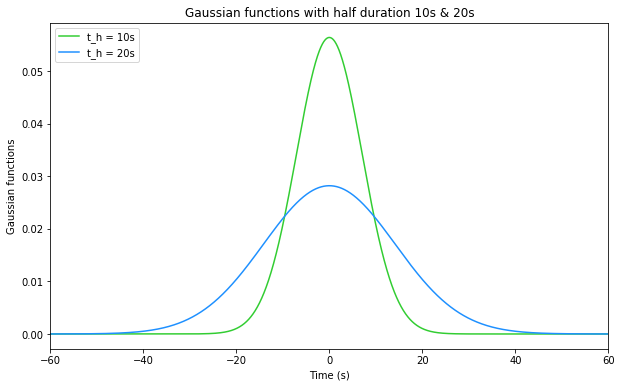

In [2]:
def g(t,h):
    return np.exp(-(t/h)**2) / (np.sqrt(np.pi)*h)

dt = 10**(-3)
t = np.arange(-60,60,dt)
g1 = g(t,10)
g2 = g(t,20)

plt.figure(figsize=(10,6))
plt.plot(t,g1,color='limegreen',label='t_h = 10s')
plt.plot(t,g2,color='dodgerblue',label='t_h = 20s')
plt.xlim(-60,60)
plt.xlabel('Time (s)')
plt.ylabel('Gaussian functions')
plt.title('Gaussian functions with half duration 10s & 20s')
plt.legend(loc="upper left")
plt.show()

## Part 2

$$
\begin{aligned}
G(\omega) &= \int_{-\infty}^{\infty} g(t) \cdot e^{-i\omega t}dt \\
&= \int_{-\infty}^{\infty} \frac{1}{\sqrt{\pi} t_H} e^{-(t/t_H)^2} \cdot e^{-i\omega t}dt \\
&= \int_{-\infty}^{\infty} \frac{1}{\sqrt{\pi} t_H} e^{-t(t + i\omega t_H^2)/t_H^2}dt \\
&= e^\frac{-\omega^2 t_H^2}{4}
\end{aligned}
$$

## Part 3

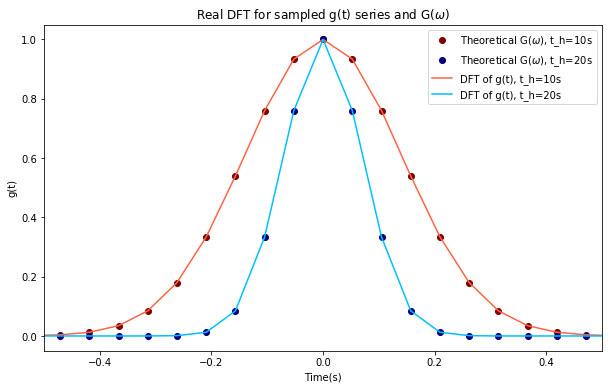

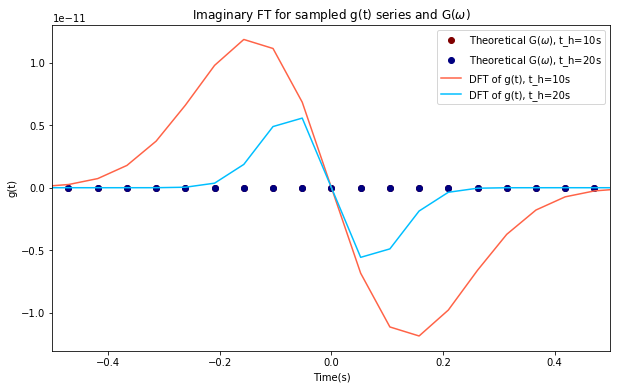

In [3]:
def ft(w,h):
    return np.exp(((-w**2) * (h**2))/4)

f_axis1 = fftshift(fftfreq(len(g1),dt))
w_axis1 = 2*np.pi*f_axis1
f_axis2 = fftshift(fftfreq(len(g2),dt))
w_axis2 = 2*np.pi*f_axis2

theor1 = ft(w_axis1,10)
theor2 = ft(w_axis2,20)

dft1 = fftshift(fft(ifftshift(g1)))*dt
dft2 = fftshift(fft(ifftshift(g2)))*dt

plt.figure(figsize=(10,6))
plt.plot(w_axis1,theor1,'o',color='maroon',label='Theoretical G($\omega$), t_h=10s')
plt.plot(w_axis2,theor2,'o',color='navy',label='Theoretical G($\omega$), t_h=20s')
plt.plot(w_axis1,dft1,color='tomato',label='DFT of g(t), t_h=10s')
plt.plot(w_axis2,dft2,color='deepskyblue',label='DFT of g(t), t_h=20s')
plt.xlim(-0.5,0.5)
plt.title('Real DFT for sampled g(t) series and G($\omega$)')
plt.xlabel('Time(s)')
plt.ylabel('g(t)')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(w_axis1,np.imag(theor1),'o',color='maroon',label='Theoretical G($\omega$), t_h=10s')
plt.plot(w_axis2,np.imag(theor2),'o',color='navy',label='Theoretical G($\omega$), t_h=20s')
plt.plot(w_axis1,np.imag(dft1),color='tomato',label='DFT of g(t), t_h=10s')
plt.plot(w_axis2,np.imag(dft2),color='deepskyblue',label='DFT of g(t), t_h=20s')
plt.xlim(-0.5,0.5)
plt.title('Imaginary FT for sampled g(t) series and G($\omega$)')
plt.xlabel('Time(s)')
plt.ylabel('g(t)')
plt.legend()
plt.show()

Note: There is no imaginary part for the theoretical curves so that's why they're both 0. Also the scale is on the power of $10^{-11}$ so the imaginary portion of the discrete fourier transforms of g(t) for the two half times are almost 0.

## Part 4

The effect of filtering a general input time function f(t) by g(t) is that it maintains lower frequencies and filters out the larger frequencies. This is because the filtering is multiplication of gaussians in Fourier space which causes destructive interference among the higher amplitudes and constructive interference among the lower frequencies. 

The outputs for $t_H = 10$ and $t_H = 20$ have the same peak at t = 0, however the values for $t_H = 20$ approach 0 faster than the values for $t_H = 10$.

## Part 5

On average, there's constructive interference near the origin and destructive interference away from the origin. The leads to a higher and sharper amplitude (frequency) near zero time. Elsewhere it is more smooth.  

# 2 Fourier transform of Window Functions (5 pts)

A continuous time signal $f(t)$ can be truncated into a signal of finite length
$T$ by window functions $b(t)$:

$$ g(t) = f(t) b(t) $$

Typical window functions include:

 * Boxcar function
    $$b(t) =
    \begin{cases}
    1 & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$
 * Hann window
    $$b(t) =
    \begin{cases}
    \frac{1}{2} \left( 1 - \cos \frac{2 \pi t}{T} \right) & 0 \leq t \leq T
    \\
    0 & \text{else}
    \end{cases}
    $$

Now let $T = 10$ seconds, and sample both window functions by $\Delta t = 0.01$ seconds:

 1. Plot both window functions on the same graph.
 2. Calculate the Fourier transform of both functions by numpy `fft()`. Pay extra attention to
    how you interpret the corresponding frequencies of output results from python.
    (_Hint_: `fftshift()` may be useful. Also pay attention to the length of the input signal
    (> 10 sec), as it dictates the frequency resolution for the spectrum.)
 3. Plot the Fourier transform of both functions in the appropriate frequency range on the
    same graph.
 4. Based on the FTs, comment on the effect of truncating a continuous time series by either
    window on its frequency spectrum $G(\omega)$ compared to the original spectrum $F(\omega)$.
 5. Speculate on the advantages and disadvantages of boxcar and Hann window functions for truncation.

## Part 1

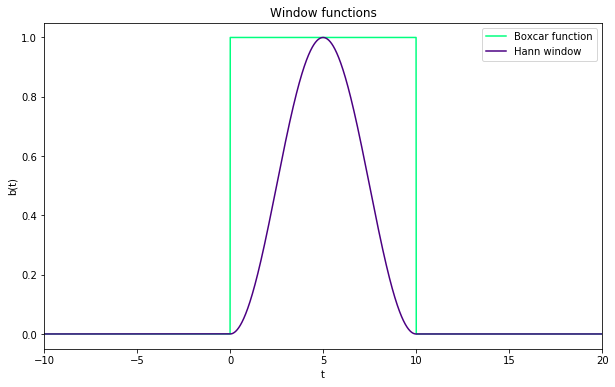

In [4]:
T = 10
dt = 0.01
t = np.arange(-40,50,dt)

def boxcar(t): 
    return np.where(np.logical_and(0 <= t, t <= T),1,0)
    
def hann(t): 
    return np.where(np.logical_and(0 <= t, t <= T),0.5*(1-np.cos(2*np.pi*t/T)),0)

b1 = boxcar(t)
b2 = hann(t)

plt.figure(figsize=(10,6))
sns.lineplot(t,b1,color='springgreen',label='Boxcar function')
sns.lineplot(t,b2,color='indigo',label='Hann window')
plt.xlim(-10,20)
plt.legend()
plt.xlabel('t')
plt.ylabel('b(t)')
plt.title('Window functions')
plt.show()

## Part 2

In [5]:
dftbox = fftshift(fft(ifftshift(b1)))*dt
dfthan = fftshift(fft(ifftshift(b2)))*dt

f_box = fftshift(fftfreq(len(b1),dt))
w_box = 2*np.pi*f_box
f_han = fftshift(fftfreq(len(b2),dt))
w_han = 2*np.pi*f_han

## Part 3

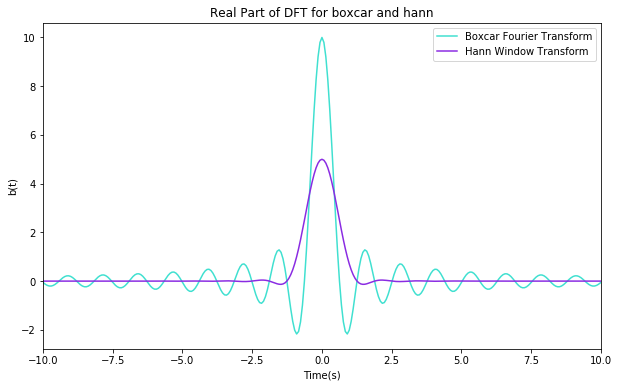

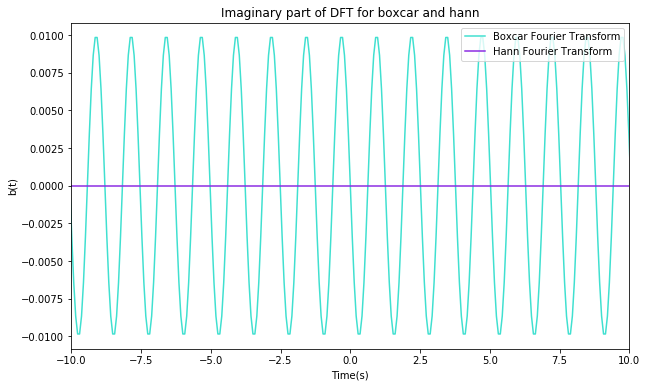

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(w_box,dftbox,color='turquoise',label='Boxcar Fourier Transform')
sns.lineplot(w_han,dfthan,color='blueviolet',label='Hann Window Transform')
plt.xlim(-10,10)
plt.title('Real Part of DFT for boxcar and hann')
plt.xlabel('Time(s)')
plt.ylabel('b(t)')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(w_box,dftbox.imag,color='turquoise',label='Boxcar Fourier Transform')
sns.lineplot(w_han,dfthan.imag,color='blueviolet',label='Hann Fourier Transform')
plt.xlim(-10,10)
plt.title('Imaginary part of DFT for boxcar and hann')
plt.xlabel('Time(s)')
plt.ylabel('b(t)')
plt.legend()
plt.show()

## Part 4

In the real parts plot, the Boxcar Fourier Transform has one main peak amplitude at the center (t=0) and dying peaks off to either side. The Hann Window just has one main peak at the center and no other smaller waves. In the imaginary plot the boxcar function has a constant amplitude throughout whereas the hann function is just a flat 0 line. From these plots we conclude that the boxcar maintains the amplitudes throughout while the hann only keeps the real part and has just the one peak.

## Part 5

Since the boxcar method takes a single value, it increases the speed of computation on the results. On the other hand, it is not a very representative sample. As for the Hann window, it covers a wider range of values, which means that it has a good variety of samples but on the other hand the computation will be slower than boxcar.

# 3 Radial Distribution Function (10 pts)

## Background

Liquids have no fixed internal structure. Yet they do have some short range order in the sense
that they have preferred intermolecular spacings, which are determined by the locations of minima
in the intermolecular potentials. The microscopic structure of liquids is often characterized by a
quantity known as the Radial Distribution Function $g(r)$, which is essentially the probability (Relative
to the average probability, which means that $g(r)$ tends to 1 at large $r$, where the neighbour is too far
away to feel any interaction.) that a molecule has a neighbouring molecule at distance $r$. Typically $g(r)$
shows a value that approaches zero at small $r$ since molecules cannot occupy the same space; it also shows a
peak at the preferred distance of nearest neighbours, and secondary peaks at preferred distances of more distant
neighbours. If a suitable collimated beam of particles (e.g. X-rays or neutrons) is sent through a
sample of the liquid, some of the particles are scattered. The number of particles scattered through
a given angle is related to the Fourier Transform of $g(r)$ evaluated at the wavenumber $k$
corresponding to the transverse momentum transfer associated with that scattering angle. Kittel derives
this relationship in Chapter 17 of Introduction to Solid State Physics.

If this all sounds complicated, all you need to know here is that something called the Structure
Factor $S(k)$ is effectively measured by looking at the scattered intensity as a function of
scattering transverse wavenumber $k$ (proportional to scattering angle), and that the Radial Distribution
Function is related to it by

$$ g(r) = 1 + \frac{1}{2 \pi^2 \rho r} \int_0^\infty k \left( S(k) - 1 \right) \sin(kr) dk $$

where $\rho$ is liquid number density (number of atoms per unit volume, computable from the three
constants mentioned in the introduction), $k$ is wavenumber, and $r$ is radius.

 1. You may have noticed some resemblance between expression (6) and the Fourier transform.
    First show that the integration part $\int_0^\infty k (S(k) - 1) \sin(kr) dk$
    can be rewritten as

    $$p(r) = \int_{-\infty}^\infty \frac{1}{2i} k \left( S(k) - 1 \right) e^{ikr} dk.$$
    
    __Hint__: The structure factor S(k) is even, since there should be no reason why scattering intensity would be different for one direction (+k) compared to its opposite (−k). Using the fact that S(k) is even may be useful.  
    

 2. Now we can make some connections between the Radial Transfer Function and the Fourier
    Transform, if we substitute $r \rightarrow t$ and $k \rightarrow \omega$. What is the Fourier transform
    $P(k)$ of $p(r)$? Is $P(k)$ a real, imaginary or general complex function? Is it even or odd? How will these
    affect $p(r)$? Is that what you expect? Plot $P(k)$ as a function of $k$ ranging from $-15 $&Aring;$^{-1}$ to $15 $&Aring;$^{-1}$
    based on `argon.py` (i.e. import and use the variables defined there).
    
    __Hint__: In constructing $S(k)$ from `argon.py`, you should make an "even" array twice the length (minus 1) of YanData. 
    YanData represents the structure factor (i.e. $S(k)$) for argon sampled at the $dk$ defined in the `argon.py` file. 
	It's specifically $S(k)$ sampled from `k = 0` to `k = len(YanData) * dk`, so create an even function out to the same length in the negative direction (i.e. the "k-axis" it's sampled on would be `-len(YanData)*dk,  ... 0, ..., + len(YanData)*dk`).
    

3. Write a Python function `[gn, rn] = RDFcalc(S, dk, rho)` to calculate Radial Distribution
    Function $g(r)$ from Structure Factor $S(k)$ data, sampled at $dk$, and density $\rho$, and output
    the RDF vector $g_n$ and its corresponding radial distance vector $r_n$.
    
    __Hint__: for Python `fft()` and `ifft()` functions, realize that the values of the Fourier Transform
    corresponding to negative frequencies are stored in the second half of the arrays given to
    (`ifft`) or obtained from it (`fft`). You also have to study the difference between the DFT and
    FT to multiply by the correct factors.
    

4. With the data provided in `argon.py`, compute the corresponding Radial Distribution Function
    $g(r)$. Plot your results for $r$ from $0$ to $20$ &Aring;. Over what range of radius can you trust your
    result?
    
    __Hint__: To check if your results make sense, recall that $g(r)$ is related to the probability that a
    molecule has a neighbouring molecule at distance $r$, therefore, should be close to $0$
    when $r \rightarrow 0$, i.e. two molecules can not occupy the same space, and you can
    set $g(r = 0) = 0$. Recall $\lim_{r\rightarrow\infty}g(r)=1$. Also note the unit $\rho$ used in $g(r)$ formula (6).
    

5. From the $g(r)$ you computed, estimate the average molecular radius $R_a$ of liquid argon. Give
    your reasoning and state what accuracy you can justify for your estimation.

6. Now we explore the effect of sampling range. Yan sampled in wavenumber $k$ out to
    $k_{max} = 15.24 $&Aring;$^{-1}$, and he could have saved himself work by not collecting as much data,
    i.e., reducing $k_{max}$. But how much could he have reduced the sampling length $k_{max}$, while still
    seeing distinct peaks in the Radial Distribution Function? Also explain theoretically what you observe.
    
    __Hint__: Plot on top of the $g(r)$ obtained in part 4, the $g(r)$'s you compute for a series of
    $k_{max}$ values. You can try half $k_{max}$ each time to look for changes. For the theoretical explanations
    for part 6 and 7, realize the interchangability of $t \leftrightarrow \omega$ ($r \leftrightarrow k$).
    
    
7. To explore the effect of data sampling, let's assume Yan decided to save his work by sampling
    less often (i.e. increasing $dk$). How large a $dk$ can he use to be able to still recover the first
    two peaks clearly? State your answers and a theoretical justification for what you expect to
    see if you increase $dk$ too much.

    __Hint__: Plot on top of the $g(r)$ obtained from `argon.py` data, the $g(r)$'s you obtain when
    you subsample the same dataset. Try doubling $dk$ each time to observe the effect of coarser
    sampling.

## Part 1

$$
\begin{aligned}
\int_0^\infty k (S(k) - 1) \sin(kr) dk &= \int_0^\infty \frac{1}{2i}k(S(k)-1)(e^{ikr}-e^{-ikr}) dk \\
&= \int_0^\infty \frac{1}{2i}k(S(k)-1)e^{ikr} + \int_0^\infty \frac{1}{2i}k(S(k)-1)(-e^{-ikr}) \\
&= \int_0^\infty \frac{1}{2i}k(S(k)-1)e^{ikr} + \int_{-\infty}^0 \frac{1}{2i}k(S(k)-1)e^{ikr} \\
&=\int_{-\infty}^\infty \frac{1}{2i} k ( S(k) - 1 ) e^{ikr} dk
\end{aligned}
$$

## Part 2

The Inverse Fourier Transform $p(r)$ is:
$$
\begin{aligned}
p(r) &= \frac{1}{2\pi} \int_{-\infty}^{\infty} P(k)e^{ikr}dk \\
&=\int_{-\infty}^\infty \frac{1}{2i} k \left( S(k) - 1 \right) e^{ikr} dk & \text{from Part 1}
\end{aligned}
$$ 
Therefore, the Fourier Transform $P(k)$ of $p(r)$ is:
$$
P(k) = \frac{\pi}{i} k ( S(k) - 1 )
$$
$P(k)$ is an imaginery function. It is an odd function. This means that $p(r)$ is real and odd.

<Figure size 432x288 with 0 Axes>

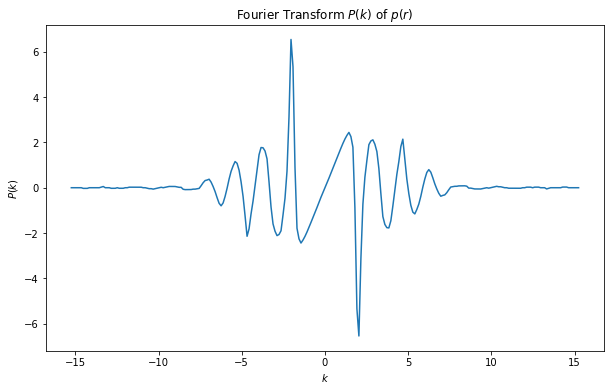

In [7]:
%run argon.py

m = len(YanData)
kmax = (m-1)*dk
k_axis = np.linspace(-kmax,kmax,2*m-1)

S = np.concatenate([YanData[:0:-1],YanData])

Pofk = -2*k_axis*(S-1)

plt.figure(figsize=(10,6))
sns.lineplot(k_axis,Pofk)
plt.xlabel('$k$')
plt.ylabel('$P(k)$')
plt.title('Fourier Transform $P(k)$ of $p(r)$')
plt.show()

## Part 3

In [8]:
def RDFcalc(S, dk, rho):
    n = len(S)
    dr = 2*np.pi/(2*kmax)
    rn = np.arange(0,n*dr,dr)
    
    Pofk = -1j*(2*k_axis*(S-1))
    pofr = ifft(ifftshift(Pofk))
    gn = 1 + ( 1 / (2*(np.pi**2)*rho*rn)) * pofr
    return [gn, rn]

## Part 4

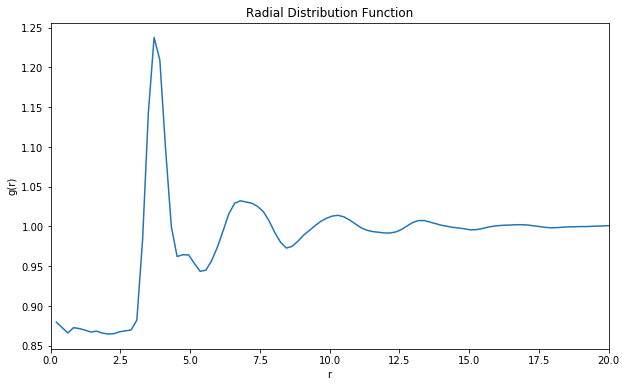

In [9]:
rho = massRho*Navogadro/(molWeight*10**24)    
[gn, rn] = RDFcalc(S, dk, rho)

plt.figure(figsize=(10,6))
plt.plot(rn,gn)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')
plt.xlim(0,20)
plt.show()

I can trust my result over a range of radius of about 3.0 to 4.0. Maybe a bit less, perhaps 3.2 to 3.8.

## Part 5

In [10]:
max_index = np.where(gn[1:] == max(gn[1:])) # first element of g is nan
rn[max_index]

array([3.50440125])

The maximum value of g(r) occurs at about r = 3.50440125. This is my estimate for the average molecular radius $R_a$ of liquid argon. On the graph I see a rather dull edge at the peak so I might be cautious and estimate it to be r = $3.5 \pm 0.1$ &Aring;

## Part 6

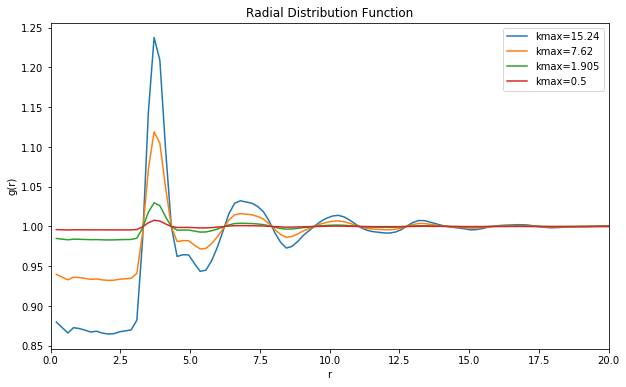

In [11]:
k_axis = np.linspace(-kmax/2,(kmax+dk/2)/2,2*m-1)
[gn2, rn2] = RDFcalc(S, dk, rho)
k_axis = np.linspace(-kmax/8,(kmax+dk/2)/8,2*m-1)
[gn3, rn3] = RDFcalc(S, dk, rho)
k_axis = np.linspace(-0.5,0.5,2*m-1)
[gn4, rn4] = RDFcalc(S, dk, rho)

plt.figure(figsize=(10,6))
plt.plot(rn,gn,label='kmax=15.24')
plt.plot(rn2,gn2,label='kmax=7.62')
plt.plot(rn3,gn3,label='kmax=1.905')
plt.plot(rn4,gn4,label='kmax=0.5')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')
plt.legend()
plt.xlim(0,20)
plt.show()

From the above plot we see that we can reduce kmax by quite a lot and still see distinct peaks. Once we get to about kmax=0.5 it becomes extremely difficult to spot even the one peak at r = 3.5, and the other peaks are no longer visible. So a kmax that allows us to see at least 2 peaks would be about 1.9 in the plot.

## Part 7

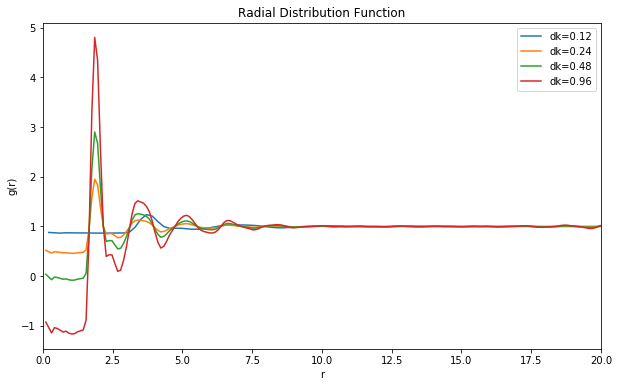

In [12]:
dk = 0.24
kmax = (m-1)*dk
k_axis = np.linspace(-kmax,kmax,2*m-1)
[gn2, rn2] = RDFcalc(S, dk, rho)
k_axis = np.linspace(-(m-1)*0.48,(m-1)*0.48,2*m-1)
[gn3, rn3] = RDFcalc(S, dk, rho)
k_axis = np.linspace(-(m-1)*0.96,(m-1)*0.96,2*m-1)
[gn4, rn4] = RDFcalc(S, dk, rho)

plt.figure(figsize=(10,6))
plt.plot(rn,gn,label='dk=0.12')
plt.plot(rn2,gn2,label='dk=0.24')
plt.plot(rn3,gn3,label='dk=0.48')
plt.plot(rn4,gn4,label='dk=0.96')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function')
plt.legend()
plt.xlim(0,20)
plt.show()

As dk gets larger it appears as though you can see the peaks better. However it does become harder to see the original two peaks of the blue line dk=0.12.